In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
url_LondonHousePrices='https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls'

In [4]:
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [5]:
workspace = properties.copy()

In [6]:
workspace.rename({'Unnamed: 0': 'date'}, axis=1, inplace=True)

In [7]:
workspace.index = workspace['date']

In [8]:
workspace.drop('date', axis=1, inplace=True)

In [9]:
workspace.drop(workspace.index[0], inplace=True)

In [10]:
workspace.drop('Unnamed: 47', axis=1, inplace=True)

In [11]:
workspace.drop(['City of London', 'Unnamed: 37'], axis=1, inplace=True)

In [12]:
workspace.drop(['Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST',
       'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England', 'Unnamed: 34'], axis=1, inplace=True)

In [13]:
workspace.loc[:,:] = workspace.loc[:,:].astype(float)

In [14]:
sample = workspace.resample('A').mean()

In [15]:
sample.loc[:,:] = round (sample.loc[:,:], 2)

In [16]:
sample.index = pd.to_datetime(sample.index).year

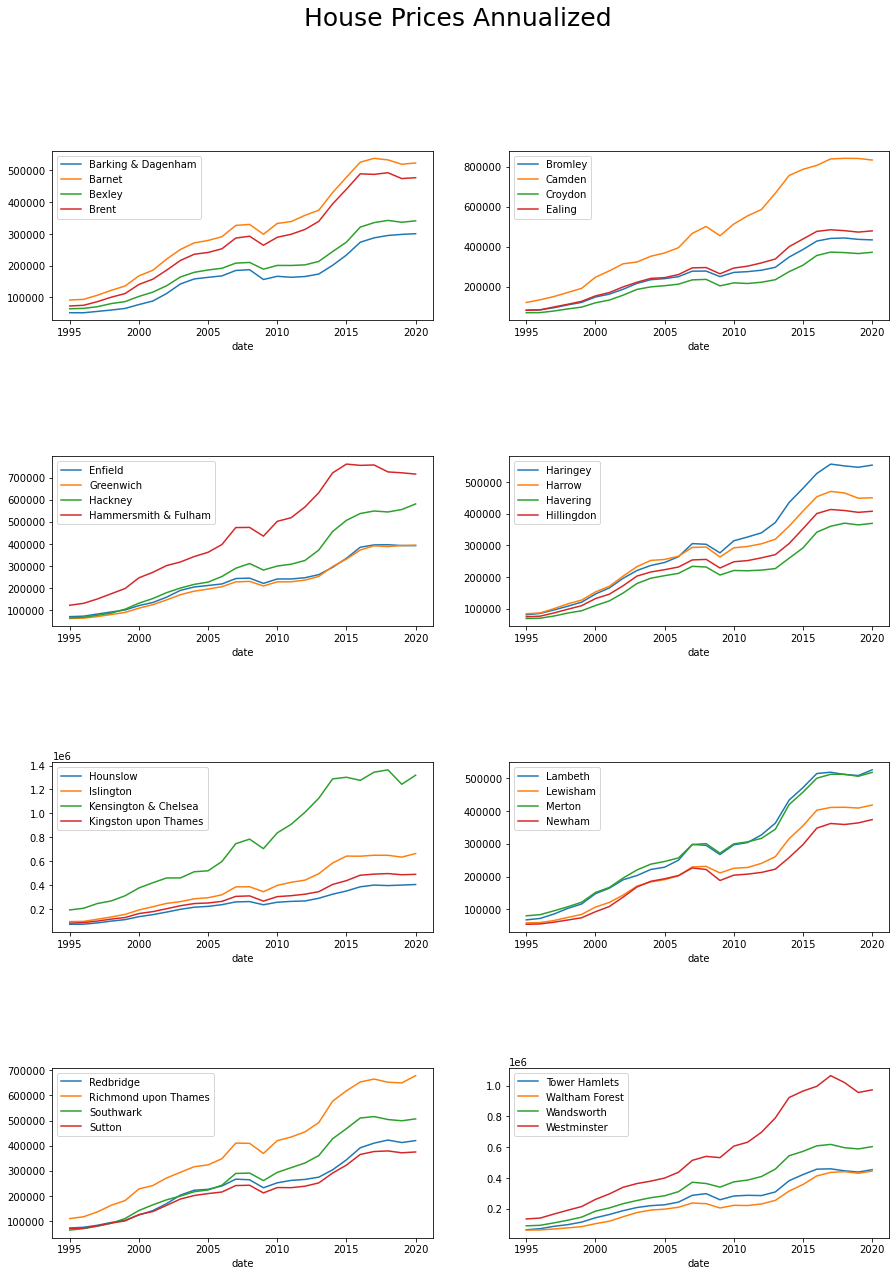

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('House Prices Annualized', fontsize=25)
fig.subplots_adjust(hspace=0.8)
sample.iloc[:,0:4].plot(ax =axes[0][0])
sample.iloc[:,4:8].plot(ax =axes[0][1])
sample.iloc[:,8:12].plot(ax =axes[1][0])
sample.iloc[:,12:16].plot(ax =axes[1][1])
sample.iloc[:,16:20].plot(ax =axes[2][0])
sample.iloc[:,20:24].plot(ax =axes[2][1])
sample.iloc[:,24:28].plot(ax =axes[3][0])
sample.iloc[:,28:32].plot(ax =axes[3][1])
for i in range(5):
    print()

In [18]:
ratio = sample/sample.loc[1995]

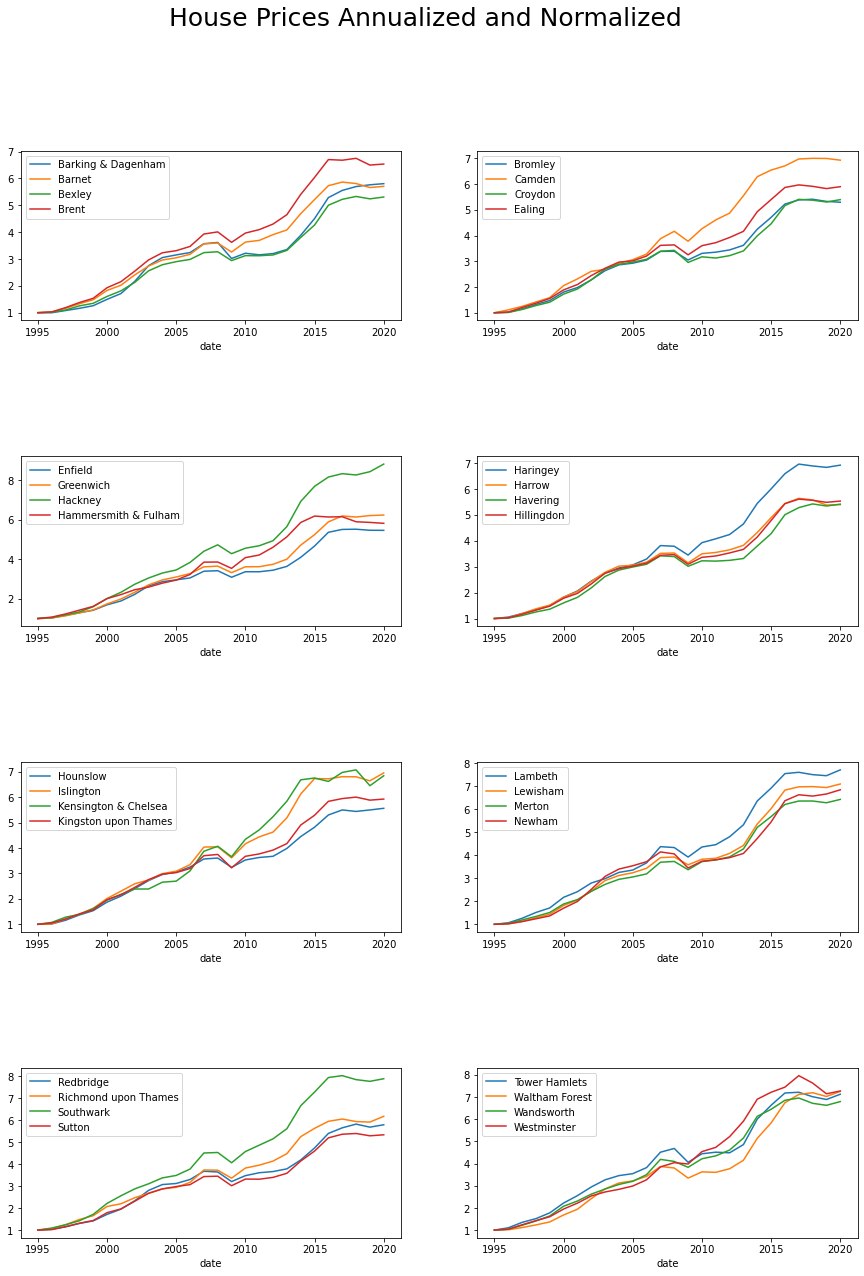

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('House Prices Annualized and Normalized', fontsize=25)
fig.subplots_adjust(hspace=0.8)
ratio.iloc[:,0:4].plot(ax =axes[0][0])
ratio.iloc[:,4:8].plot(ax =axes[0][1])
ratio.iloc[:,8:12].plot(ax =axes[1][0])
ratio.iloc[:,12:16].plot(ax =axes[1][1])
ratio.iloc[:,16:20].plot(ax =axes[2][0])
ratio.iloc[:,20:24].plot(ax =axes[2][1])
ratio.iloc[:,24:28].plot(ax =axes[3][0])
ratio.iloc[:,28:32].plot(ax =axes[3][1])
for i in range(5):
    print()

In [20]:
ratio.columns[(ratio.iloc[-1].max()==ratio.iloc[-1])]

Index(['Hackney'], dtype='object')